# Visualization/Exploration

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# import data
data = pd.read_csv("cleaned_data.csv")
pd.set_option('display.max_columns', None)
data.head()

C:\Users\gian\AppData\Local\Temp\ipykernel_19236\2356049147.py:9: DtypeWarning: Columns (22,36,37,46,47,48,49,50,51,52,53,54,56,112,113,118) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("cleaned_data.csv")


,Reporting Railroad Name,Report Year,Accident Number,Accident Year,Accident Month,Other Railroad Name,Other Accident Number,Other Accident Year,Other Accident Month,Maintenance Railroad Name,...,Other Railroad Company Grouping,Other Railroad Class,Other Railroad SMT Grouping,Other Parent Railroad Company Name,Other Railroad Holding Company,Maintenance Railroad Company Grouping,Maintenance Railroad Class,Maintenance Railroad SMT Grouping,Maintenance Parent Railroad Company Name,Maintenance Railroad Holding Company
0,Norfolk Southern Railway Company,2016.0,120068,16.0,4.0,NaN,NaN,NaN,NaN,Norfolk Southern Railway Company,...,NaN,NaN,NaN,NaN,NaN,NaN,Class 1,SMT-3 - Norfolk Southern,Norfolk Southern Railway Company,Norfolk Southern Railway Company
1,Norfolk Southern Railway Company,2016.0,120068,16.0,4.0,NaN,NaN,NaN,NaN,Norfolk Southern Railway Company,...,NaN,NaN,NaN,NaN,NaN,NaN,Class 1,SMT-3 - Norfolk Southern,Norfolk Southern Railway Company,Norfolk Southern Railway Company
2,Conrail,1981.0,0420001,81.0,4.0,NaN,NaN,NaN,NaN,Conrail,...,NaN,NaN,NaN,NaN,NaN,NaN,Class 3,NaN,Consolidated Rail Corporation,Not Assigned
3,Norfolk Southern Railway Company,2016.0,120161,16.0,4.0,NaN,NaN,NaN,NaN,Norfolk Southern Railway Company,...,NaN,NaN,NaN,NaN,NaN,NaN,Class 1,SMT-3 - Norfolk Southern,Norfolk Southern Railway Company,Norfolk Southern Railway Company
4,Norfolk Southern Railway Company,2016.0,120161,16.0,4.0,NaN,NaN,NaN,NaN,Norfolk Southern Railway Company,...,NaN,NaN,NaN,NaN,NaN,NaN,Class 1,SMT-3 - Norfolk Southern,Norfolk Southern Railway Company,Norfolk Southern Railway Company


## Data Visualization

### Accidents Per Year

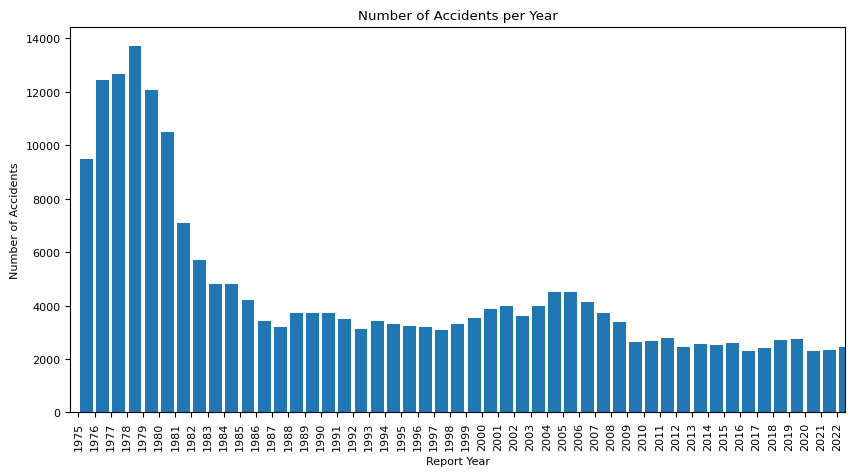

In [12]:
# find number of NA for Report Year
min_year = int(data['Report Year'].min())
max_year = int(data['Report Year'].max())
plt.figure(figsize=(10, 5))
plt.xlim(min_year - 0.5, max_year + 0.5)
plt.hist(data['Report Year'], bins=range(min_year, max_year + 2), rwidth=0.8)
plt.xlabel('Report Year')
plt.xticks(range(min_year, max_year + 1, 1))
plt.xticks(rotation=90)
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year')
plt.savefig('accidents_per_year.png')
plt.show()

### Accidents Per Company

Companies with incident counts < 3000 were grouped for an interpretable chart.

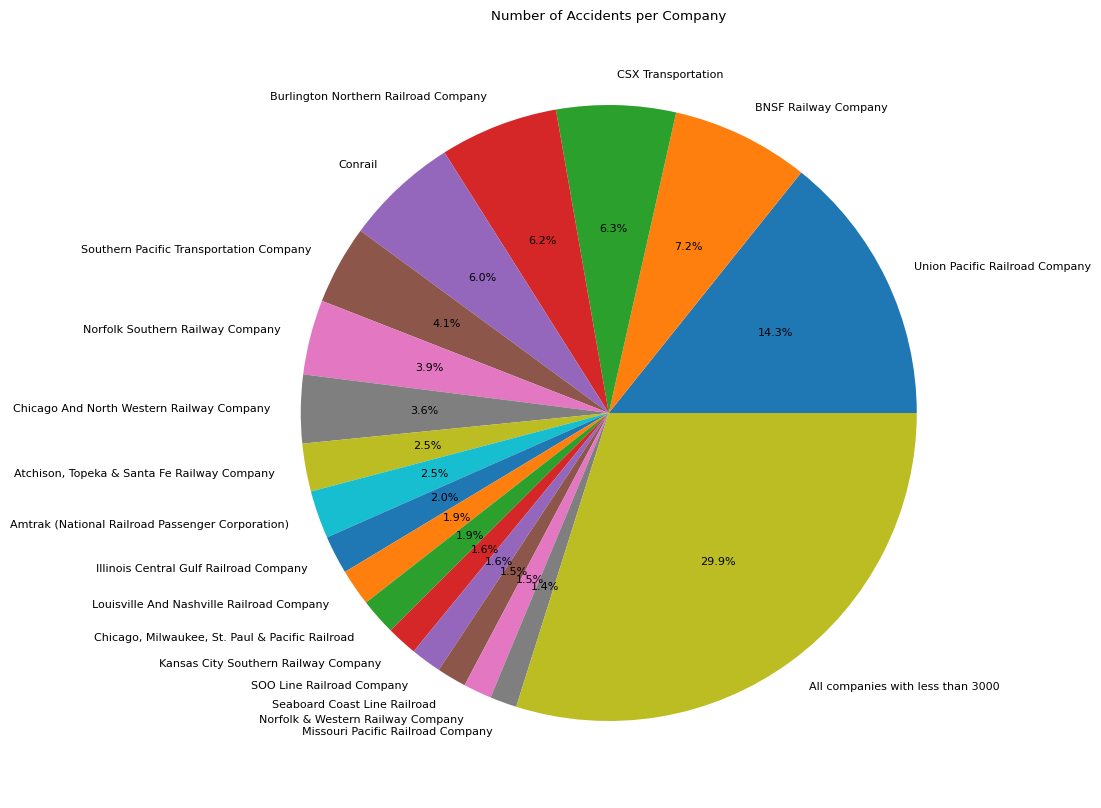

In [3]:
# Pie plot showing number of accidents per company
# Group all companies with less than 500 accidents into "Other"
plt.figure(figsize=(10, 10))
companies = data['Reporting Railroad Name'].value_counts()
companies['All companies with less than 3000'] = companies[companies < 3000].sum()
companies = companies[companies > 3000]
# make text smaller
matplotlib.rcParams.update({'font.size': 8})
plt.pie(companies, labels=companies.index, autopct='%1.1f%%')
plt.title('Number of Accidents per Company')
plt.show()

In [4]:
#Looking At Companies
print(companies)

Union Pacific Railroad Company                      30808
BNSF Railway Company                                15623
CSX Transportation                                  13529
Burlington Northern Railroad Company                13414
Conrail                                             12897
Southern Pacific Transportation Company              8957
Norfolk Southern Railway Company                     8492
Chicago And North Western Railway Company            7760
Atchison, Topeka & Santa Fe Railway Company          5434
Amtrak (National Railroad Passenger Corporation)     5432
Illinois Central Gulf Railroad Company               4349
Louisville And Nashville Railroad Company            4154
Chicago, Milwaukee, St. Paul & Pacific Railroad      4145
Kansas City Southern Railway Company                 3493
SOO Line Railroad Company                            3485
Seaboard Coast Line Railroad                         3345
Norfolk & Western Railway Company                    3211
Missouri Pacif

#### Box and Whisker of Accidents Per Company

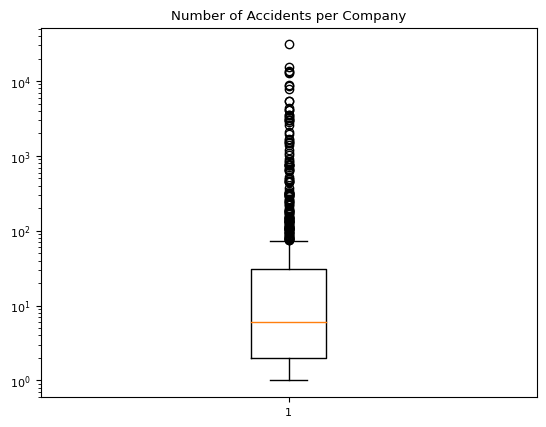

In [5]:
# box and whisker plot of accidents per company
companies = data['Reporting Railroad Name'].value_counts()
plt.boxplot(companies)
plt.title('Number of Accidents per Company')
plt.yscale('log')
plt.show()

#### Accidents Per Year for Conrail

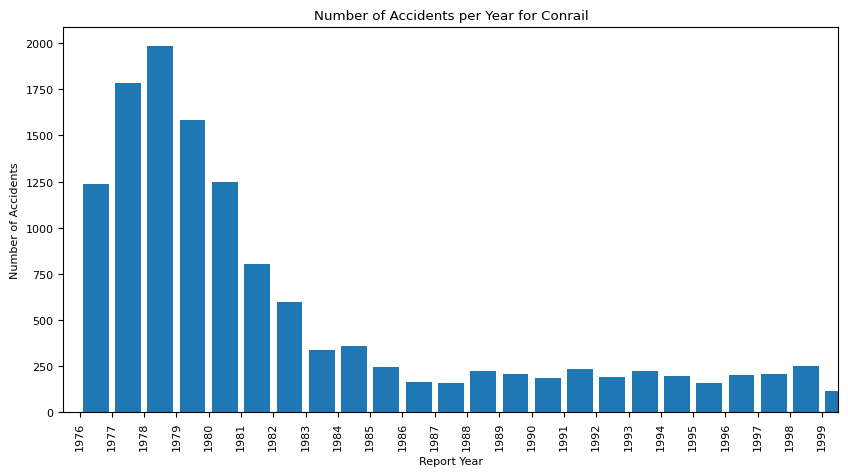

In [6]:
conrail = data[data['Reporting Railroad Name'] == 'Conrail']
min_year = int(conrail['Report Year'].min())
max_year = int(conrail['Report Year'].max())
plt.figure(figsize=(10, 5))
plt.xlim(min_year - 0.5, max_year + 0.5)
plt.hist(conrail['Report Year'], bins=range(min_year, max_year + 2), rwidth=0.8)
plt.xlabel('Report Year')
plt.xticks(range(min_year, max_year + 1, 1))
plt.xticks(rotation=90)
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year for Conrail')
plt.show()

### Accidents Per Month

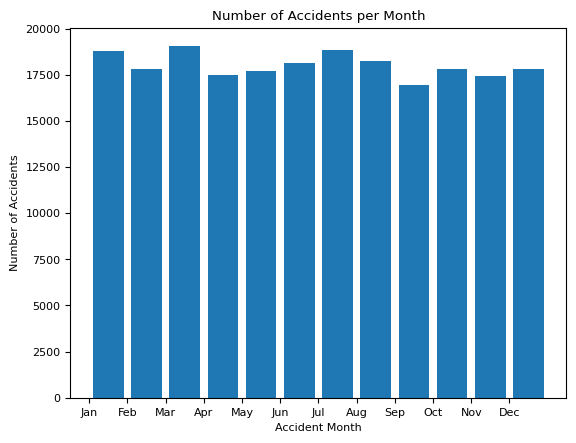

In [7]:
# Accident month
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.hist(data['Accident Month'], bins=range(1, 14), rwidth=0.8)
plt.xlabel('Accident Month')
plt.xticks(range(1, 13), months)
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Month')
plt.show()

### Accidents by Latitude and Longitude

In [8]:
# get data head for longitude and latitude
data[['Longitude', 'Latitude']].head()
data_long_lat = data[['Longitude', 'Latitude']]
data_long_lat = data_long_lat.dropna()
# remove all with 0
data_long_lat = data_long_lat[(data_long_lat.T != 0).any()]
# Removing outliers with z-score > 4
data_long_lat = data_long_lat[(np.abs(stats.zscore(data_long_lat)) < 4).all(axis=1)]
# add Accident Type back in
data_long_lat = pd.concat([data_long_lat, data['Accident Type']], axis=1)
# find unique accident types
accident_types = data_long_lat['Accident Type'].unique()
# get counts of accident types
accident_type_counts = data_long_lat['Accident Type'].value_counts()
print(accident_type_counts)
print(accident_types)

Derailment                       139485
Side collision                    21614
Other impacts                     20193
Hwy-rail crossing                 11005
Rear end collision                 4786
Raking collision                   4399
Other (describe in narrative)      4335
Obstruction                        3929
Fire/violent rupture               3098
Head on collision                  2341
Broken train collision              741
RR grade crossing                    89
Explosion-detonation                 84
Name: Accident Type, dtype: int64
['Derailment' 'Side collision' 'Hwy-rail crossing' 'Other impacts'
 'Other (describe in narrative)' 'Rear end collision'
 'Fire/violent rupture' 'Obstruction' 'Raking collision'
 'Head on collision' 'Broken train collision' 'RR grade crossing'
 'Explosion-detonation' nan]


read!
16 7.16
-67.06 -124.1461 48.999802 23.456


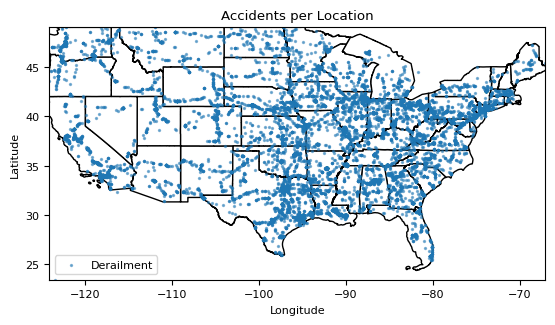

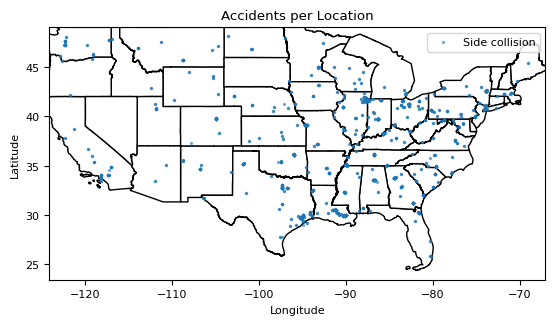

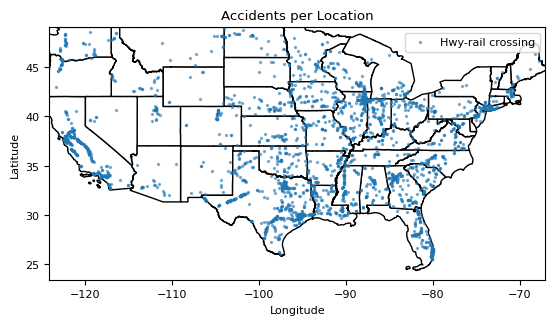

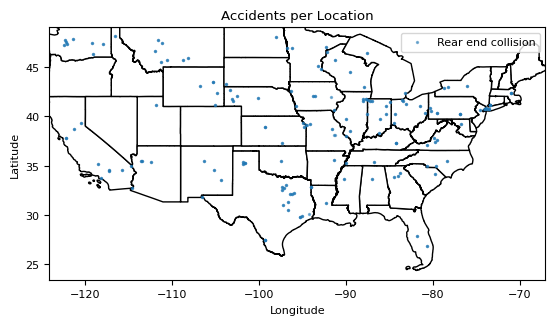

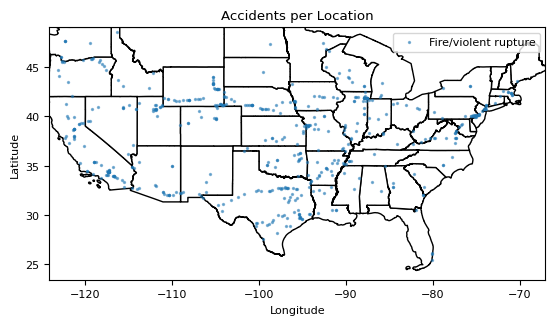

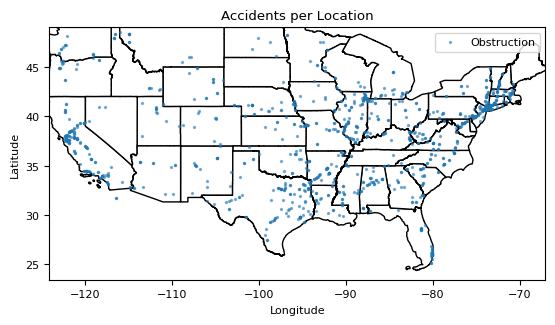

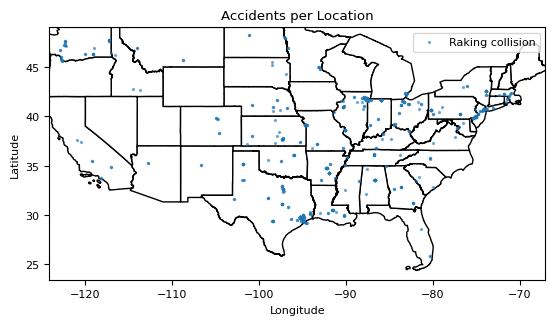

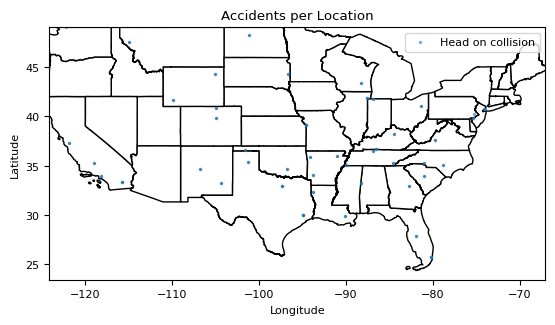

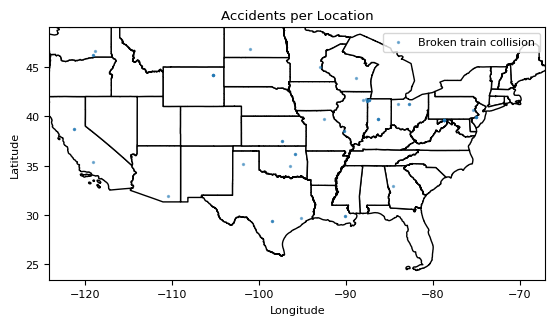

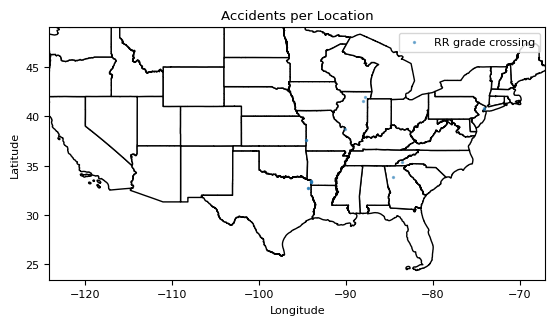

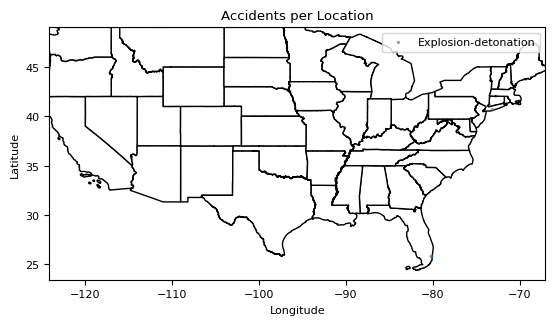

In [11]:
import geopandas
# tl_2022_us_state.shp
usa = geopandas.read_file('usa_data/tl_2022_us_state.shp')
usa = usa.to_crs("EPSG:4326")
print("read!")

# find max and min of long and lat in order to find the proper figure size so that the plot isn't squished
long_max = data_long_lat['Longitude'].max()
long_min = data_long_lat['Longitude'].min()
lat_max = data_long_lat['Latitude'].max()
lat_min = data_long_lat['Latitude'].min()
div = (long_max - long_min) / (lat_max - lat_min)
width = 16
height = width / div
print(width, round(height,2))
print(long_max, long_min, lat_max, lat_min)
# plt.figure(figsize=(width, height))
# make color based on Accident Type
# plt.scatter(data_long_lat['Longitude'], data_long_lat['Latitude'], s=0.2)
for accident_type in accident_types:
    # skip those that dont have an accident type
    if accident_type != accident_type: continue
    # skip other
    if accident_type == 'Other (describe in narrative)': continue
    if accident_type == 'Other impacts': continue
    # plot usa color red and only borders
    usa.plot(color='white', edgecolor='black', ax=plt.gca())

    plt.scatter(data_long_lat[data_long_lat['Accident Type'] == accident_type]['Longitude'], data_long_lat[data_long_lat['Accident Type'] == accident_type]['Latitude'], s=2, alpha = 0.5, label=accident_type)
    # plt.figure(figsize=(width, height))
    plt.xlim(long_min, long_max)
    plt.ylim(lat_min, lat_max)  
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Accidents per Location')
    plt.legend()
    # save to file
    # get name as only characters
    accident_type_name = accident_type.replace(' ', '_')
    accident_type_name = accident_type.replace('/', '_')
    plt.savefig('accidents_per_location' + accident_type_name + '.png')
    plt.show()

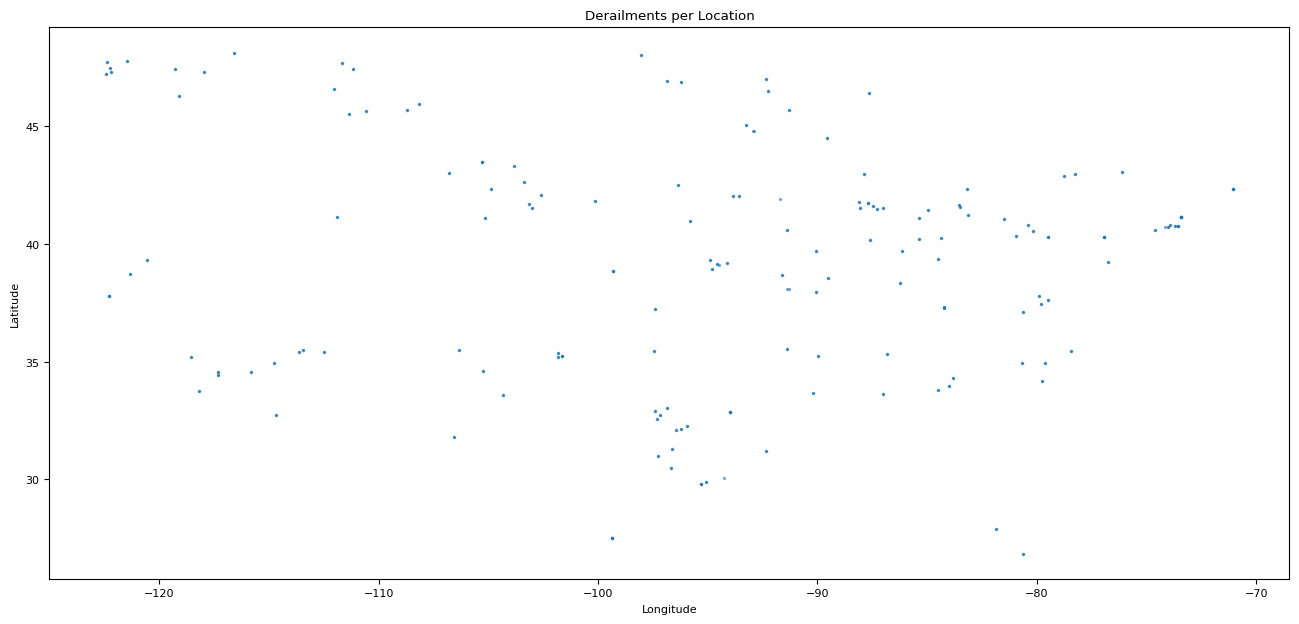

In [10]:
# plotting only Derailments
derailments = data_long_lat[data_long_lat['Accident Type'] == 'Rear end collision']
plt.figure(figsize=(width, height))
plt.scatter(derailments['Longitude'], derailments['Latitude'], s=2, alpha = 0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Derailments per Location')
# save to file
plt.savefig('derailments_per_location.png', dpi=1000)
plt.show()

In [11]:
'''colors = {'Derailment':(1,0,0,.5), 'Side collision':(1, .9, 3, .5), 'Hwy-rail crossing':(0, 1, 0, .5), 'Other impacts':(1, .9, 3, .5),
 'Other (describe in narrative)':(.5,.5,.5, .5), 'Rear end collision':(1, .9, 3, .5),
 'Fire/violent rupture':(1, .5, 0, .5), 'Obstruction':'purple', 'Raking collision':(1, .9, 3, .5),
 'Head on collision':(1, .9, 3, .5), 'Broken train collision':(1, .9, 3, .5), 'RR grade crossing':(0, 1, 0, .5),
 'Explosion-detonation':(0,0,0,.5)}

plt.figure(figsize=(width, height))
plt.scatter(data=data_long_lat, x='Longitude', y='Latitude', s=0.2, c ='Accident Type'.map(colors))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accidents per Location')
plt.show()'''

# sns.scatterplot('Longitude', 'Latitude', data=data_long_lat, hue='Accident Type', s=10)
# sns.set(rc={'figure.figsize':(width,height)})

# plt.show()

"colors = {'Derailment':(1,0,0,.5), 'Side collision':(1, .9, 3, .5), 'Hwy-rail crossing':(0, 1, 0, .5), 'Other impacts':(1, .9, 3, .5),\n 'Other (describe in narrative)':(.5,.5,.5, .5), 'Rear end collision':(1, .9, 3, .5),\n 'Fire/violent rupture':(1, .5, 0, .5), 'Obstruction':'purple', 'Raking collision':(1, .9, 3, .5),\n 'Head on collision':(1, .9, 3, .5), 'Broken train collision':(1, .9, 3, .5), 'RR grade crossing':(0, 1, 0, .5),\n 'Explosion-detonation':(0,0,0,.5)}\n\nplt.figure(figsize=(width, height))\nplt.scatter(data=data_long_lat, x='Longitude', y='Latitude', s=0.2, c ='Accident Type'.map(colors))\nplt.xlabel('Longitude')\nplt.ylabel('Latitude')\nplt.title('Accidents per Location')\nplt.show()"

### Passengers Killed Per Accident

Accidents with 0 deaths removed for this visualization since they heavily outnumber those with deaths. This is just a look at a distrubution of deaths per accident for accidents with deaths occuring.

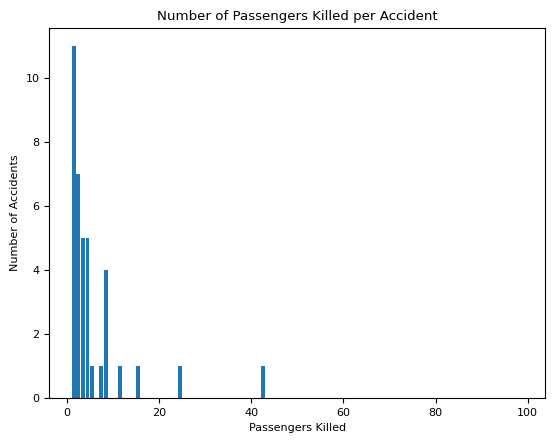

In [12]:
# plot of Passengers Killed
data['Passengers Killed'].describe()
pk = data['Passengers Killed']
pk = pk[pk > 0]
plt.hist(pk, bins=range(1, 100, 1), rwidth=0.8)
plt.xlabel('Passengers Killed')
plt.ylabel('Number of Accidents')
plt.title('Number of Passengers Killed per Accident')
plt.show()


### Number of Accidents by Accident Type 

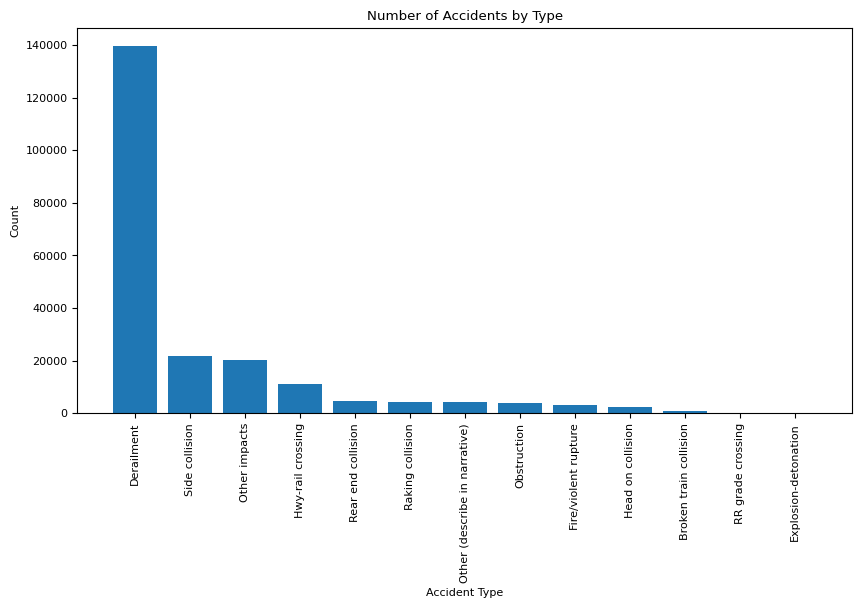

In [13]:
#Cause of Accidents/Initial Accident
accident_type = data['Accident Type'].value_counts()
#print(accident_type.index)
plt.figure(figsize=(10, 5))
plt.bar(accident_type.index,accident_type[:])
plt.xticks(rotation='vertical')
plt.xlabel("Accident Type")
plt.ylabel("Count")
plt.title("Number of Accidents by Type")
plt.show()


In [34]:
# Principal component analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# get data for PCA
data_pca_orig = data
# fill in missing values with average
data_pca_orig = data_pca_orig.fillna(data_pca.mean())
# remove all non-numeric columns
data_pca_orig = data_pca_orig.select_dtypes(include=['float64', 'int64'])


C:\Users\gian\AppData\Local\Temp\ipykernel_33144\707343222.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_pca_orig = data_pca_orig.fillna(data_pca.mean())


In [43]:
data_pca = data_pca_orig
print(data_pca.shape)
data_pca.head()


(216100, 68)


,Report Year,Accident Year,Accident Month,Other Accident Year,Other Accident Month,Maintenance Accident Year,Maintenance Accident Month,Day,Hazmat Cars,Hazmat Cars Damaged,...,Others Injured,Persons Killed For Reporting Railroad,Persons Injured For Reporting Railroad,Total Persons Killed,Total Persons Injured,Total Killed Form 54,Total Injured Form 54,Latitude,Longitude,Joint CD
0,2016.0,16.0,4.0,58.95342,6.454618,16.0,4.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.813658,-83.622785,3.0
1,2016.0,16.0,4.0,58.95342,6.454618,16.0,4.0,9.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.813658,-83.622785,1.0
2,1981.0,81.0,4.0,58.95342,6.454618,81.0,4.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.851784,-43.808917,3.0
3,2016.0,16.0,4.0,58.95342,6.454618,16.0,4.0,16.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.899959,-84.285001,3.0
4,2016.0,16.0,4.0,58.95342,6.454618,16.0,4.0,16.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.899959,-84.285001,1.0


In [44]:
# standardize the data
scaler = StandardScaler()
scaler.fit(data_pca)
data_pca = scaler.transform(data_pca)


In [45]:
# perform PCA
pca = PCA(n_components=2)
pca.fit(data_pca)
data_pca = pca.transform(data_pca)


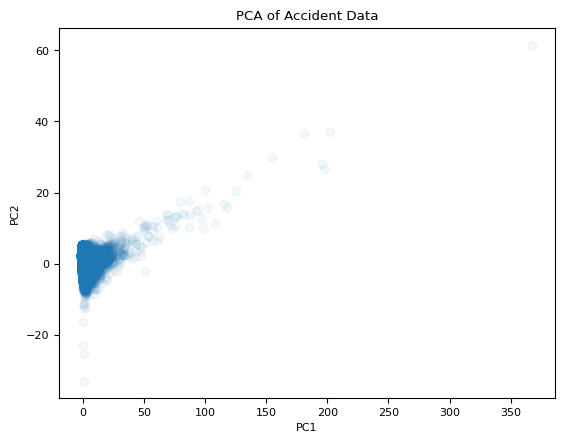

In [46]:

# plot PCA
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.05)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Accident Data')
plt.show()


In [47]:
# remove outliers from data_pca
data_pca = pd.DataFrame(data_pca)
data_pca = data_pca[(np.abs(stats.zscore(data_pca)) < 8).all(axis=1)]


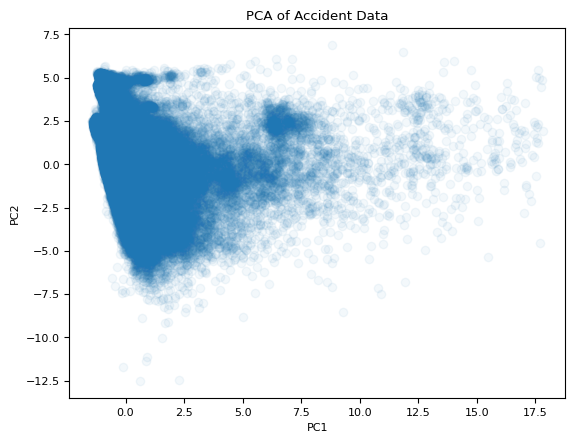

In [48]:
# graph PCA with outliers removed
plt.scatter(data_pca[0], data_pca[1], alpha=0.05)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Accident Data')
plt.show()


In [49]:
# perform cluster analysis using dbscan
from sklearn.cluster import DBSCAN

# randomly sample 10% of the data
data_pca_sample = data_pca.sample(frac=0.25, random_state=1)

# 5 clusters
dbscan = DBSCAN(eps=0.5, min_samples=25)
dbscan.fit(data_pca_sample)

DBSCAN(min_samples=25)

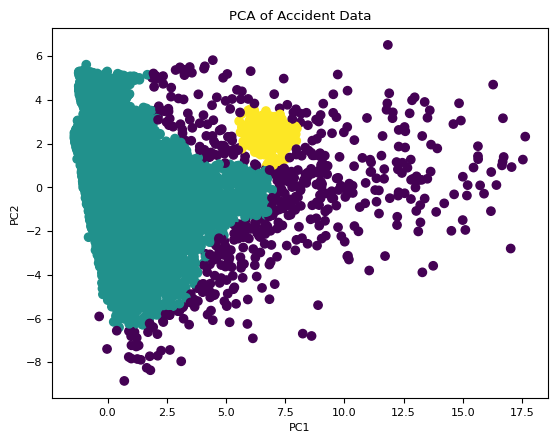

In [50]:
# plot the clusters
plt.scatter(data_pca_sample[0], data_pca_sample[1], c=dbscan.labels_, alpha=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Accident Data')
plt.show()

c:\Users\gian\miniconda3\envs\treten\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


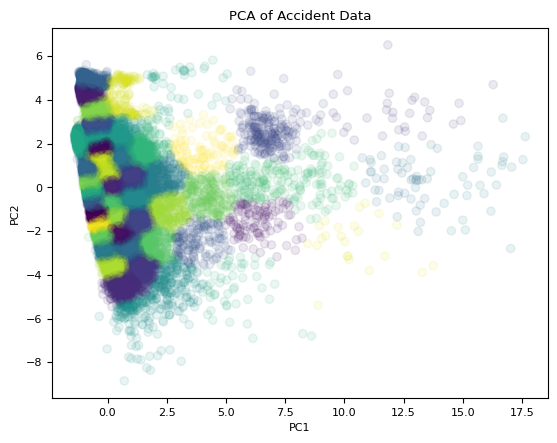

In [51]:
# kmeans
from sklearn.cluster import KMeans

# 5 clusters
kmeans = KMeans(n_clusters=20)
kmeans.fit(data_pca_sample)

# plot the clusters
plt.scatter(data_pca_sample[0], data_pca_sample[1], c=kmeans.labels_, alpha=0.1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Accident Data')
plt.show()
